In [1]:
from drivecycle import trajectory, drivecycle, plots, utils, graph, energy
import matplotlib.pyplot as plt
import numpy as np
import inspect

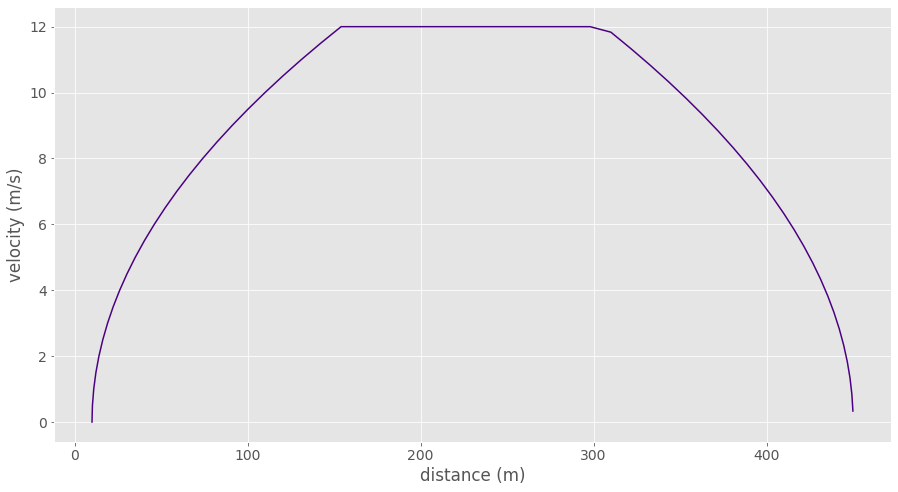

In [2]:
traj = trajectory.const_accel(vi=0,v_target=12,vf=0,di=10,df=450,step=1,a_max=0.5)
plots.plot_vd(traj, "plot_vt.png")

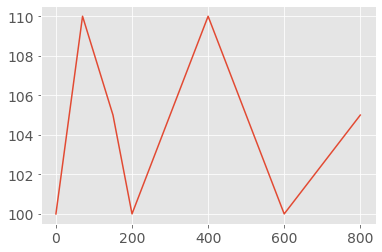

In [3]:
elv = np.array([[0,100],[70,110],[150,105],[200,100],[400,110],[600,100],[800,105]])
x = [i[0] for i in elv]
y = [i[1] for i in elv]
    
plt.plot(x,y)

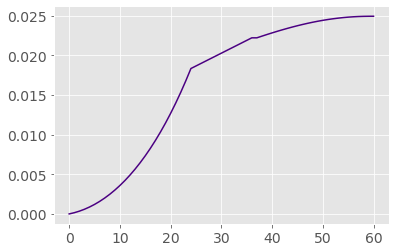

In [4]:
power = energy.battery_model(traj, m=10000, regen_ratio=0.5, num_cells=200)

t=[i[0] for i in power]
p=[i[5] for i in power]

plt.plot(t,p, color='#4b0082', linewidth=1.5)

In [18]:
edges = [
    {
        "way_id":1,
        "speed":20,
        "length":1000,
        "intersection":["primary"]
    },
    {
        "way_id":2,
        "speed":20,
        "length":3045,
        "intersection":["primary"]
    },
    {
        "way_id":6,
        "speed":20,
        "length":4000,
        "intersection":["bus_stop"]
    },
    {
        "way_id":3,
        "speed":50,
        "length":5000,
        "intersection":["primary"]
    },
    {
        "way_id":4,
        "speed":50,
        "length":4000,
        "intersection":["tertiary"]
    },
    {
        "way_id":5,
        "speed":20,
        "length":5000,
        "intersection":["service","service"]
    }
]


stop={"bus_stop":30,"tertiary":10}

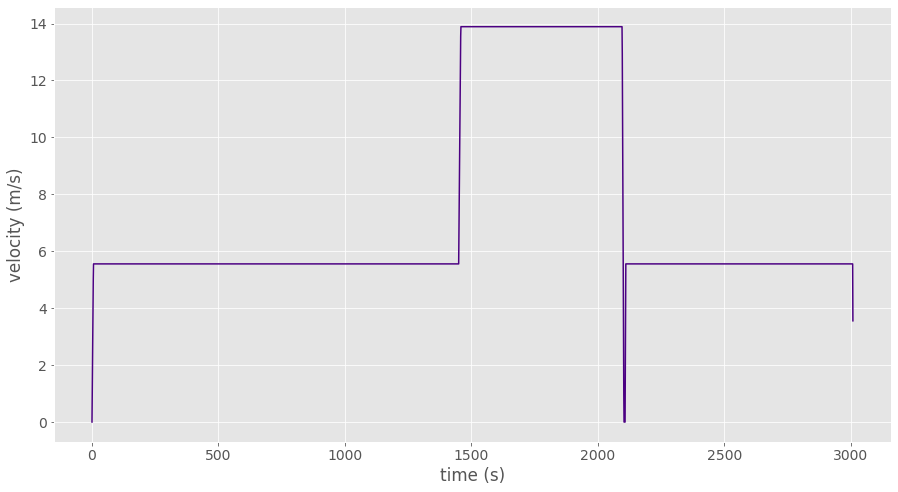

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 5.00000000e-01],
       ...,
       [3.00700000e+03, 5.55555556e+00, 2.60752400e+04],
       [3.00800000e+03, 5.55555556e+00, 2.60807955e+04],
       [3.00900000e+03, 3.55555556e+00, 2.60853511e+04]])

In [19]:
dc = drivecycle.sequential(edges,stops=stop, stop_at_node=True,step=1)
plots.plot_vt(dc, "drivecycle_vd.png")
dc

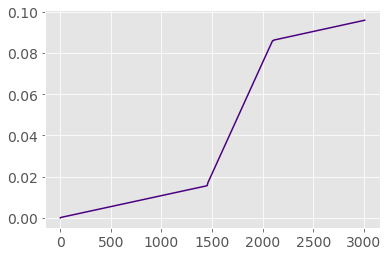

In [23]:
power = energy.battery_model(dc[1:], m=2000, regen_ratio=0.5, num_cells=600)

t=[i[0] for i in power]
p=[i[5] for i in power]

plt.plot(t,p, color='#4b0082', linewidth=1.5)

In [3]:
energy.open_circuit_voltage(0.5, 1, type="LION")

3.5200000000000005